In [3]:
pip install yfinance


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ------------------------------------- 949.2/949.2 kB 14.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 14.3 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15617 sha256=8891f4d020648dc345df23ace68f43d1fff4a18919523a6bc66ae9965ee2aeee
  Stored in directory: c:\users\ayoos\appdata\local\pip\cache\wheels\cc\bd\6f\664d62c99327abeef7d86489e663

In [5]:
import yfinance as yf
import pandas as pd

# Use the new behavior: auto_adjust=True gives clean close prices
tickers = {
    'AAPL': 'Apple',
    'MSFT': 'Microsoft',
    'NFLX': 'Netflix',
    'AMZN': 'Amazon',
    'GOOGL': 'Google'
}

all_data = pd.DataFrame()

for ticker in tickers:
    print(f"\nDownloading data for {tickers[ticker]} ({ticker})...")
    data = yf.download(ticker,
                       start='2015-01-01',
                       end='2023-12-31',
                       interval='1mo',
                       auto_adjust=True)  # This is now default, but we add it explicitly
    
    if not data.empty:
        all_data[ticker] = data['Close']
    else:
        print(f"⚠️ No data returned for {ticker} — check internet or symbol.")

# Drop any rows with missing data (e.g., from early years)
all_data.dropna(inplace=True)

# Save to CSV
all_data.to_csv('tech_stock_prices.csv')
print("\n✅ Data download complete. File saved as 'tech_stock_prices.csv'.")
print(all_data.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed




✅ Data download complete. File saved as 'tech_stock_prices.csv'.
                 AAPL       MSFT       NFLX       AMZN      GOOGL
Date                                                             
2015-01-01  26.028084  34.558331  63.114285  17.726500  26.717266
2015-02-01  28.538477  37.509472  67.844284  19.007999  27.963791
2015-03-01  27.752272  35.028248  59.527142  18.605000  27.569656
2015-04-01  27.912857  41.902969  79.500000  21.089001  27.274923
2015-05-01  29.057028  40.369503  89.151428  21.461500  27.103451


In [9]:
print("Data Range:", all_data.index.min(), "to", all_data.index.max())
print("Total months:", len(all_data))

expected_months = 12 * (2023 - 2015 + 1)
print("Expected months:", expected_months)

print("\nAny missing months?\n", all_data.index.to_series().diff().value_counts())

Data Range: 2015-01-01 00:00:00 to 2023-12-01 00:00:00
Total months: 108
Expected months: 108

Any missing months?
 Date
31 days    62
30 days    36
28 days     7
29 days     2
Name: count, dtype: int64



Missing values per column:
 AAPL     0
MSFT     0
NFLX     0
AMZN     0
GOOGL    0
dtype: int64

Desctiptive stats:
              AAPL        MSFT        NFLX        AMZN       GOOGL
count  108.000000  108.000000  108.000000  108.000000  108.000000
mean    82.191691  156.583752  300.758017   92.339092   73.400206
std     56.998164  101.509626  158.348833   48.367051   35.712218
min     21.294884   34.558331   59.527142   17.726500   26.717266
25%     33.324526   61.590204  149.010002   45.768875   44.997138
50%     52.769579  127.878159  308.994995   89.538750   60.270538
75%    136.825577  243.653805  413.700005  133.237495  102.661308
max    194.502594  373.898285  690.309998  175.353500  147.163422


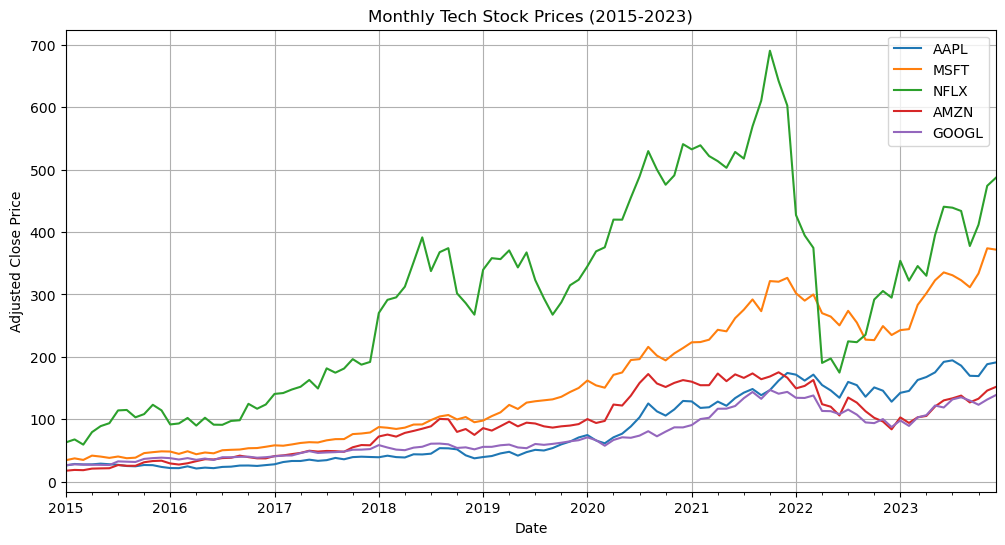

In [15]:
print("\nMissing values per column:\n", all_data.isna().sum())

print("\nDesctiptive stats:\n", all_data.describe())

import matplotlib.pyplot as plt
all_data.plot(figsize=(12,6), title="Monthly Tech Stock Prices (2015-2023)")
plt.ylabel("Adjusted Close Price")
plt.grid(True)
plt.show()

In [17]:
monthly_returns = all_data.pct_change().dropna()

print("Monthly returns (%):\n", monthly_returns.head())

monthly_returns.to_csv('monthly_returns.csv')

Monthly returns (%):
                 AAPL      MSFT      NFLX      AMZN     GOOGL
Date                                                        
2015-02-01  0.096449  0.085396  0.074943  0.072293  0.046656
2015-03-01 -0.027549 -0.066149 -0.122592 -0.021202 -0.014094
2015-04-01  0.005786  0.196262  0.335525  0.133513 -0.010690
2015-05-01  0.040991 -0.036596  0.121402  0.017663 -0.006287
2015-06-01 -0.033206 -0.051709  0.052687  0.011323 -0.009682


In [21]:
cumulative_returns = (1 + monthly_returns).cumprod()

print("Cumulative returns:\n", cumulative_returns.head())

cumulative_returns.to_csv('cumulative_reurns.csv')


Cumulative returns:
                 AAPL      MSFT      NFLX      AMZN     GOOGL
Date                                                        
2015-02-01  1.096449  1.085396  1.074943  1.072293  1.046656
2015-03-01  1.066243  1.013598  0.943164  1.049559  1.031904
2015-04-01  1.072413  1.212529  1.259620  1.189688  1.020873
2015-05-01  1.116372  1.168155  1.412540  1.210702  1.014454
2015-06-01  1.079302  1.107752  1.486962  1.224410  1.004632


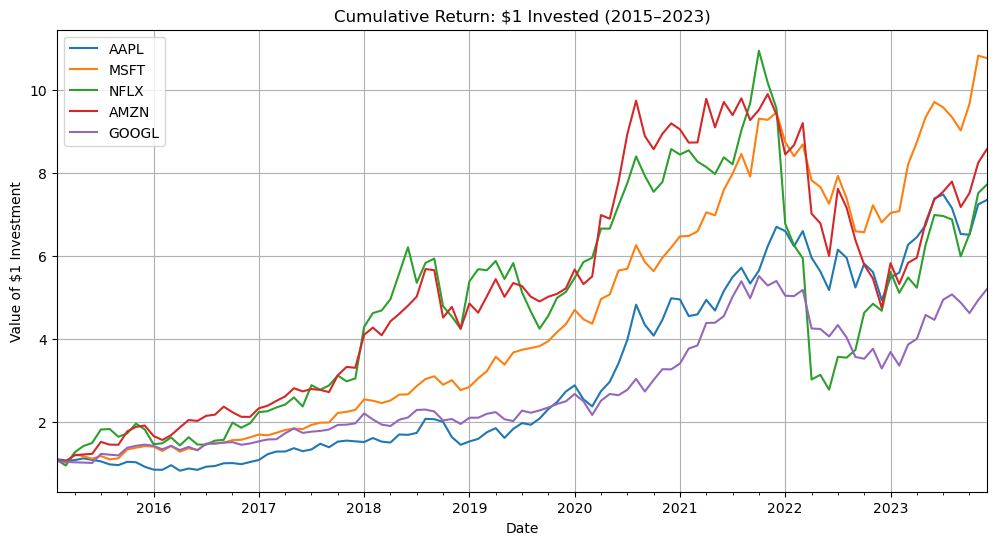

In [23]:
import matplotlib.pyplot as plt

cumulative_returns.plot(figsize=(12,6))
plt.title("Cumulative Return: $1 Invested (2015–2023)")
plt.ylabel("Value of $1 Investment")
plt.xlabel("Date")
plt.grid(True)
plt.show()


In [25]:
import numpy as np
import pandas as pd

# --- 4A. Core stats ---
rf_annual = 0.03
rf_monthly = rf_annual / 12

avg_m_ret = monthly_returns.mean()
std_m_ret = monthly_returns.std()

annual_return = avg_m_ret * 12
annual_vol    = std_m_ret * np.sqrt(12)

sharpe = (annual_return - rf_annual) / annual_vol

summary = pd.DataFrame({
    'Annual Return': annual_return,
    'Annual Volatility': annual_vol,
    'Sharpe Ratio': sharpe
}).sort_values('Sharpe Ratio', ascending=False)

print(summary)
summary.to_csv('risk_return_summary.csv')


       Annual Return  Annual Volatility  Sharpe Ratio
MSFT        0.292118           0.217300      1.206253
AAPL        0.265309           0.284447      0.827252
AMZN        0.291777           0.316731      0.826495
GOOGL       0.215624           0.245012      0.757612
NFLX        0.324869           0.424611      0.694446


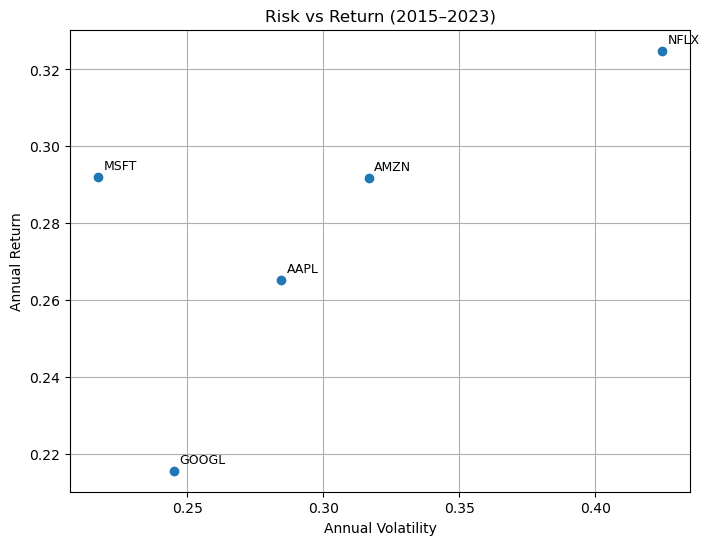

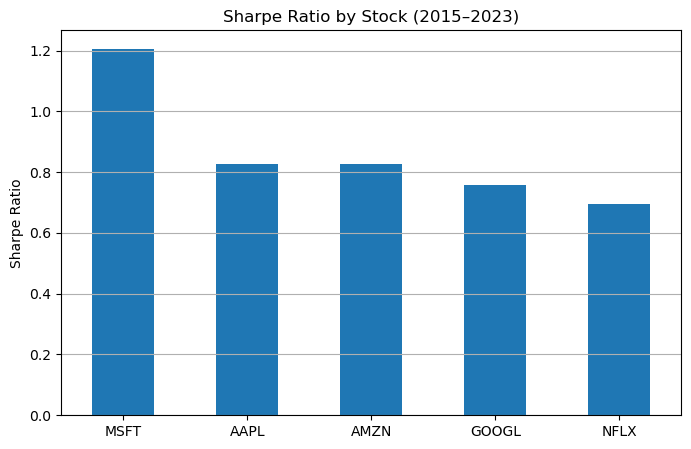

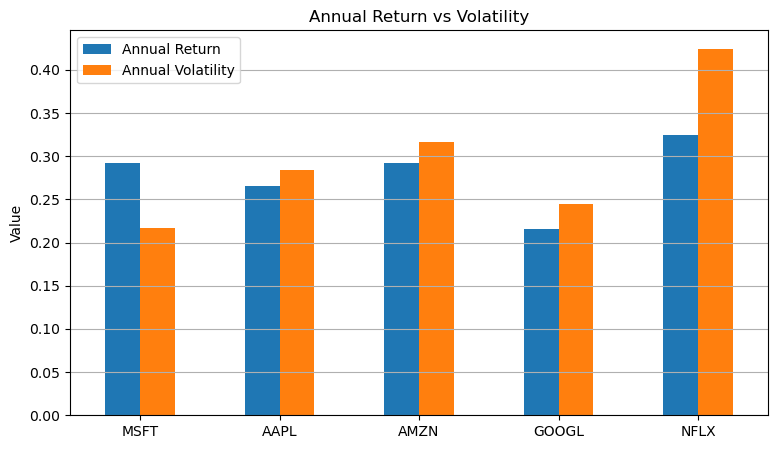

In [27]:
import matplotlib.pyplot as plt


summary_plot = summary.copy()


plt.figure(figsize=(8,6))
plt.scatter(summary_plot['Annual Volatility'], summary_plot['Annual Return'])

for ticker in summary_plot.index:
    plt.text(summary_plot.loc[ticker,'Annual Volatility']+0.002,
             summary_plot.loc[ticker,'Annual Return']+0.002,
             ticker, fontsize=9)

plt.title('Risk vs Return (2015–2023)')
plt.xlabel('Annual Volatility')
plt.ylabel('Annual Return')
plt.grid(True)
plt.show()


summary_plot['Sharpe Ratio'].plot(kind='bar', figsize=(8,5))
plt.title('Sharpe Ratio by Stock (2015–2023)')
plt.ylabel('Sharpe Ratio')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


summary_plot[['Annual Return','Annual Volatility']].plot(kind='bar', figsize=(9,5))
plt.title('Annual Return vs Volatility')
plt.ylabel('Value')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


       2019 Vol  2020 Vol  2021 Vol  Full Period Vol
AAPL   0.243527  0.397373  0.226091         0.284447
AMZN   0.228007  0.346682  0.197972         0.316731
GOOGL  0.176939  0.308716  0.225320         0.245012
MSFT   0.145404  0.232819  0.208394         0.217300
NFLX   0.373059  0.196508  0.220736         0.424611


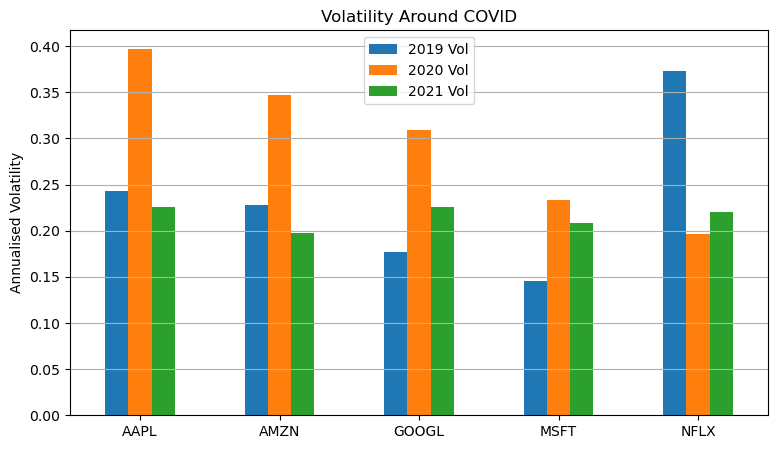

In [29]:

covid_period = monthly_returns.loc['2020-01-01':'2020-12-31']
covid_vol = covid_period.std() * (12 ** 0.5)

pre_period = monthly_returns.loc['2019-01-01':'2019-12-31']
pre_vol = pre_period.std() * (12 ** 0.5)

post_period = monthly_returns.loc['2021-01-01':'2021-12-31']
post_vol = post_period.std() * (12 ** 0.5)

covid_compare = pd.DataFrame({
    '2019 Vol': pre_vol,
    '2020 Vol': covid_vol,
    '2021 Vol': post_vol,
    'Full Period Vol': summary['Annual Volatility']
})

print(covid_compare)
covid_compare.to_csv('covid_vol_compare.csv')


covid_compare[['2019 Vol','2020 Vol','2021 Vol']].plot(kind='bar', figsize=(9,5))
plt.title('Volatility Around COVID')
plt.ylabel('Annualised Volatility')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()
